<a href="https://colab.research.google.com/github/Hellfik/data-augmentation/blob/main/Copy_of_AugLy_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Note: restart runtime after this import before running the augmentations
!pip install -U augly
!sudo apt-get install python3-magic

     |████████████████████████████████| 40.1MB 69kB/s 
     |████████████████████████████████| 51.0MB 128kB/s 
     |████████████████████████████████| 153kB 52.9MB/s 
     |████████████████████████████████| 399kB 34.7MB/s 
     |████████████████████████████████| 112kB 44.2MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 3.4MB 29.8MB/s 
     |████████████████████████████████| 645kB 35.2MB/s 
     |████████████████████████████████| 727kB 32.5MB/s 
     |████████████████████████████████| 430kB 28.7MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 1.9MB 36.2MB/s 
     |████████████████████████████████| 25.3MB 122kB/s 
     |████████████████████████████████| 22.3MB 1.8MB/s 
     |████████████████████████████████| 829kB 35.3MB/s 
     |████████████████████████████████| 27.4MB 98kB/s 
     |████████████████████████████████| 11.6MB 264kB/s 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1
Suggested packages:
  file
The following NEW packages will be installed:
  libmagic-mgc libmagic1 python3-magic
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 262 kB of archives.
After this operation, 5,257 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-magic all 2:0.4.15-1 [9,280 B]
Fetched 262 kB in 1s (394 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76

# New Section

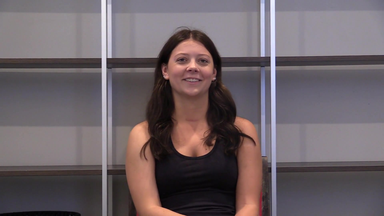

In [1]:
import os
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display

# Get input image, scale it down to avoid taking up the whole screen
input_img_path = os.path.join(
    utils.TEST_URI, "image", "inputs", "dfdc_1.jpg"
)

# We can use the AugLy scale augmentation
input_img = imaugs.scale(input_img_path, factor=0.2)
display(input_img)

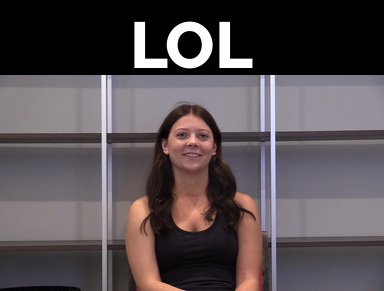

In [2]:
# Now we can apply various augmentations to the scaled image!
display(
    imaugs.meme_format(
        input_img,
        caption_height=75,
        meme_bg_color=(0, 0, 0),
        text_color=(255, 255, 255),
    )
)

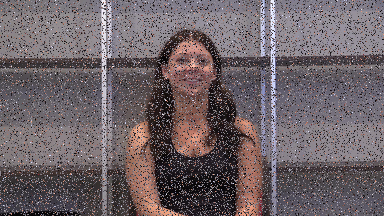

[{'dst_height': 216,
  'dst_width': 384,
  'factor': 0.3,
  'intensity': 30.0,
  'name': 'shuffle_pixels',
  'output_path': None,
  'seed': 10,
  'src_height': 216,
  'src_width': 384}]

In [3]:
"""
You can optionally pass in a metadata list, to which metadata about the
augmentation will be appended, including kwargs, input & output dimensions,
and intensity (defined based on the kwargs for each augmentation).
"""
meta = []
display(imaugs.shuffle_pixels(input_img, factor=0.3, metadata=meta))
meta

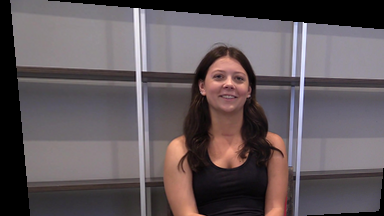

[{'crop_out_black_border': False,
  'dst_height': 216,
  'dst_width': 384,
  'dx': 0.0,
  'dy': 0.0,
  'intensity': 20.0,
  'name': 'perspective_transform',
  'output_path': None,
  'seed': 42,
  'sigma': 20.0,
  'src_height': 216,
  'src_width': 384}]

In [4]:
# For all the augmentations, we have class-based definitions as well as
# functional
meta = []
aug = imaugs.PerspectiveTransform(sigma=20.0)
display(aug(input_img, metadata=meta))
meta

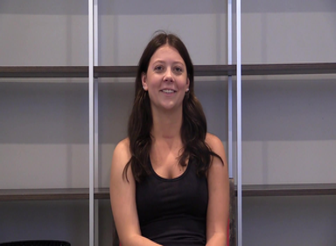

[]

In [5]:
"""
For some augmentations, we also provide versions that will randomly sample
from a set of parameters (e.g. for ChangeAspectRatio, RandomAspectRatio
samples an emoji from Twitter's Twemoji set which we provide in the augly
package). The metadata will contain the actual sampled param values.
"""
meta = []
aug = imaugs.RandomAspectRatio()
display(aug(input_img))
meta

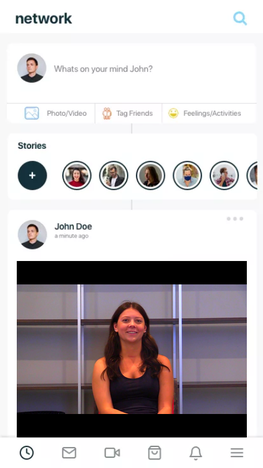

In [6]:
# You can also compose several transformations together
aug = imaugs.Compose(
    [
        imaugs.Saturation(factor=2.0),
        imaugs.OverlayOntoScreenshot(
            template_filepath=os.path.join(
                utils.SCREENSHOT_TEMPLATES_DIR, "mobile.png"
            ),
        ),
        imaugs.Scale(factor=0.6),
    ]
)
display(aug(input_img))

In [ ]:
# Testez d'autres transformations: https://github.com/facebookresearch/AugLy/blob/main/augly/image/__init__.py

# Other transformations on image files

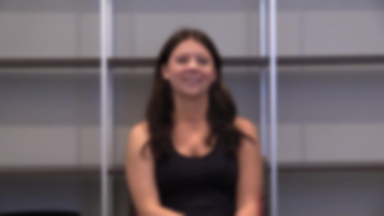

[]

In [7]:
"""
For some augmentations, we also provide versions that will randomly sample
from a set of parameters (e.g. for ChangeAspectRatio, RandomAspectRatio
samples an emoji from Twitter's Twemoji set which we provide in the augly
package). The metadata will contain the actual sampled param values.
"""
meta = []
aug = imaugs.Blur()
display(aug(input_img))
meta

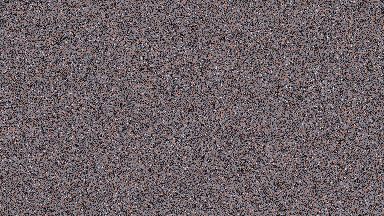

[]

In [13]:
"""
For some augmentations, we also provide versions that will randomly sample
from a set of parameters (e.g. for ChangeAspectRatio, RandomAspectRatio
samples an emoji from Twitter's Twemoji set which we provide in the augly
package). The metadata will contain the actual sampled param values.
"""
aug = imaugs.shuffle_pixels(image=input_img)
display(aug)
meta

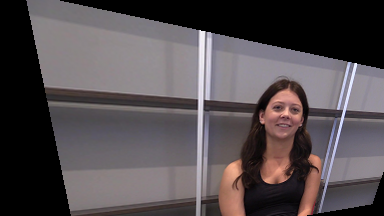

[]

In [16]:
"""
For some augmentations, we also provide versions that will randomly sample
from a set of parameters (e.g. for ChangeAspectRatio, RandomAspectRatio
samples an emoji from Twitter's Twemoji set which we provide in the augly
package). The metadata will contain the actual sampled param values.
"""
meta = []
aug = imaugs.perspective_transform(image=input_img)
display(aug)
meta